# Micro Credit Project

### Variable	Definition	Comment

1. label>	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}	
2. msisdn>	mobile number of user	
3. aon>	age on cellular network in days	
4. daily_decr30>	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	
5. daily_decr90>	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)	
6. rental30>	Average main account balance over last 30 days	Unsure of given definition
7. rental90>	Average main account balance over last 90 days	Unsure of given definition
8. last_rech_date_ma>	Number of days till last recharge of main account	
9. last_rech_date_da>	Number of days till last recharge of data account	
10. last_rech_amt_ma>	Amount of last recharge of main account (in Indonesian Rupiah)	
11. cnt_ma_rech30>	Number of times main account got recharged in last 30 days	
12. fr_ma_rech30>	Frequency of main account recharged in last 30 days	Unsure of given definition
13. sumamnt_ma_rech30>	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	
14. medianamnt_ma_rech30>	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)	
15. medianmarechprebal30>	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	
16. cnt_ma_rech90>	Number of times main account got recharged in last 90 days	
17. fr_ma_rech90>	Frequency of main account recharged in last 90 days	Unsure of given definition
18. sumamnt_ma_rech90>	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)	
19. medianamnt_ma_rech90>	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)	
20. medianmarechprebal90>	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)	
21. cnt_da_rech30>	Number of times data account got recharged in last 30 days	
22. fr_da_rech30>	Frequency of data account recharged in last 30 days	
23. cnt_da_rech90>	Number of times data account got recharged in last 90 days	
24. fr_da_rech90>	Frequency of data account recharged in last 90 days	
25. cnt_loans30>	Number of loans taken by user in last 30 days	
26. amnt_loans30>	Total amount of loans taken by user in last 30 days	
27. maxamnt_loans30>	maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively
28. medianamnt_loans30>	Median of amounts of loan taken by the user in last 30 days	
29. cnt_loans90>	Number of loans taken by user in last 90 days	
30. amnt_loans90>	Total amount of loans taken by user in last 90 days	
31. maxamnt_loans90>	maximum amount of loan taken by the user in last 90 days	
32. medianamnt_loans90>	Median of amounts of loan taken by the user in last 90 days	
33. payback30>	Average payback time in days over last 30 days	
34. payback90>	Average payback time in days over last 90 days	
35. pcircle>	telecom circle	
36. pdate>	date	


In [1]:
#import basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading dataset

df=pd.read_csv('C:/Users/HP/Desktop/Data_file.csv')
df.head()

,no,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [3]:
# checking shape

df.shape

(209593, 37)

In [4]:
# checking types of data

df.dtypes

no                        int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [5]:
df.isnull().sum()

no                      0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
# spliting pdate into month, date and year.

df[['month','date','year']]=df['pdate'].str.split('/',expand=True)

col=['month','date','year']
for c in col:
    df[c]=df[c].astype(int)
   
df.dtypes                              

no                        int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

## Summary statistics

In [7]:
df.describe()

,no,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date,year
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.0
mean,104797.000000,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,...,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321,14.39894,2016.0
std,60504.431823,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,...,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435,8.43890,0.0
min,1.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.00000,2016.0
25%,52399.000000,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,...,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000,7.00000,2016.0
50%,104797.000000,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,...,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000,14.00000,2016.0
75%,157195.000000,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,...,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000,21.00000,2016.0
max,209593.000000,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,...,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000,31.00000,2016.0


#### Observations


= In columns aon,daily_decr30,daily_decr90,rental30 and rental90 huge difference b/w 75% and max value. there can be outliers. 

= And also columns last_rech_date_ma,last_rech_date_da and cnt_loans90 more defference b/w 75% and max.

= year have only 2016 so we can drop it.

 


In [8]:
# Now we are showing unique column and frequancies

for col in df.columns:
        u=df[col].unique()
        v=df[col].value_counts()
        print('>>>>>>>>>>>>>>>>>>>>>>>>>',col,'<<<<<<<<<<<<<<<<<<<')
        print(u)
        print(v)
        print('\n')

>>>>>>>>>>>>>>>>>>>>>>>>> no <<<<<<<<<<<<<<<<<<<
[     1      2      3 ... 209591 209592 209593]
2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: no, Length: 209593, dtype: int64


>>>>>>>>>>>>>>>>>>>>>>>>> label <<<<<<<<<<<<<<<<<<<
[0 1]
1    183431
0     26162
Name: label, dtype: int64


>>>>>>>>>>>>>>>>>>>>>>>>> msisdn <<<<<<<<<<<<<<<<<<<
['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
04581I85330    7
47819I90840    7
67324I84453    6
30080I90588    6
71742I90843    6
              ..
61684I70788    1
62293I70379    1
45901I90581    1
03343I95201    1
49162I88698    1
Name: msisdn, Length: 186243, dtype: int64


>>>>>>>>>>>>>>>>>>>>>>>>> aon <<<<<<<<<<<<<<<<<<<
[2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05]
95.0000        392
92.0000        362
96.0000        357
99.0000        356
157.0000       349
  

>>>>>>>>>>>>>>>>>>>>>>>>> cnt_ma_rech90 <<<<<<<<<<<<<<<<<<<
[  2   1   8   9   4   7   0   3  19  10   6  20  11  16  15   5  18  14
  13  12  34  30  17  25  26  23  33  27  22  70  40  21  39  24  35  28
  37  31  29  43  45  48  63  42  32  36  46  59  38  53  57  51  62  49
  58  41  64  83  82  67  50  60  47  90  97  54  44  56  73 172  74  71
  78  52 118  69  68  61  55  92  75  80  77  99  65  79  94  72  66  93
  85  86 140 110  84  81 105 100  98 121 132  88 127  96 336 151 104  91
  87 120]
1      27898
2      24052
0      20950
3      20446
4      17329
       ...  
151        1
336        1
121        1
172        1
127        1
Name: cnt_ma_rech90, Length: 110, dtype: int64


>>>>>>>>>>>>>>>>>>>>>>>>> fr_ma_rech90 <<<<<<<<<<<<<<<<<<<
[21  0  2  3  1  5 30 10 26  8 31 64 66 12 32 15  7 18  4  9 57 50 67 11
  6 44 41 45 35 40 33 34 37 22 23 17 36 42 25 20 13 14 47 46 51 16 39 48
 59 24 38 19 55 62 52 65 29 74 28 71 54 56 60 43 49 27 70 53 73 78 68 58
 79 69 61 72 85 77 75 

>>>>>>>>>>>>>>>>>>>>>>>>> amnt_loans90 <<<<<<<<<<<<<<<<<<<
[ 12   6  42  18  24  30  48 108  36  60  78  54  72   0 204 162  84 132
  66  90 102 300 138 168  96 114 156 120 126 144 180 198 174 216 192 276
 150 234 228 312 222 384 186 240 252 408 288 210 306 354 258 270 396 246
 342 264 378 426 294 438 330 318 360 324 348 372 282 402 336]
6      69131
12     38908
18     23867
24     17216
30     12503
       ...  
360        1
426        1
396        1
438        1
342        1
Name: amnt_loans90, Length: 69, dtype: int64


>>>>>>>>>>>>>>>>>>>>>>>>> maxamnt_loans90 <<<<<<<<<<<<<<<<<<<
[ 6 12  0]
6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64


>>>>>>>>>>>>>>>>>>>>>>>>> medianamnt_loans90 <<<<<<<<<<<<<<<<<<<
[0.  1.  0.5 2.  1.5 3. ]
0.0    197424
1.0      6172
0.5      5668
2.0       307
1.5        19
3.0         3
Name: medianamnt_loans90, dtype: int64


>>>>>>>>>>>>>>>>>>>>>>>>> payback30 <<<<<<<<<<<<<<<<<<<
[29.          0.          2.33333333 ... 56.75  

columns year and pcircle have same values in all rows




In [9]:
df.corr()

,no,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date,year
no,1.000000,0.000403,-0.002048,0.002739,0.003077,-0.003906,-0.003459,-0.001853,-0.001133,-0.001064,...,-0.002005,0.002241,0.000781,0.001742,-0.002615,-0.000040,0.002411,0.003205,-0.002045,NaN
label,0.000403,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,...,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.154949,0.006825,NaN
aon,-0.002048,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,...,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,-0.001863,0.000662,NaN
daily_decr30,0.002739,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,...,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.518664,0.006477,NaN
daily_decr90,0.003077,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,...,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,0.539410,-0.021508,NaN
rental30,-0.003906,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,...,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.365699,0.036537,NaN
rental90,-0.003459,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,...,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501,0.429407,0.008941,NaN
last_rech_date_ma,-0.001853,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,...,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583,-0.001207,0.000560,NaN
last_rech_date_da,-0.001133,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,...,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417,-0.001800,0.000631,NaN
last_rech_amt_ma,-0.001064,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,...,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260,0.096919,0.028883,NaN


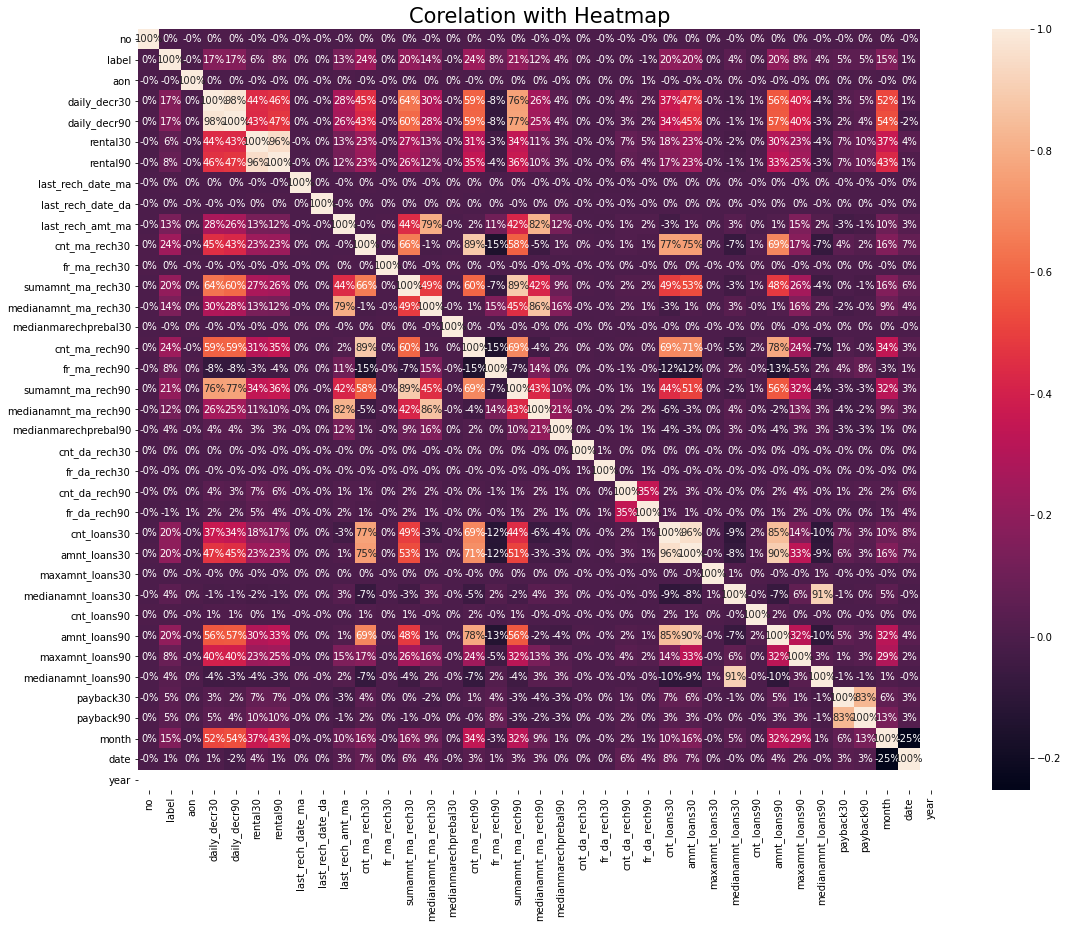

In [10]:
# checking correlations with heatmap

plt.figure(figsize=(18,14))
sns.heatmap(df.corr(),annot=True,fmt='0.0%')
plt.title('Corelation with Heatmap',fontsize=21)
plt.show()

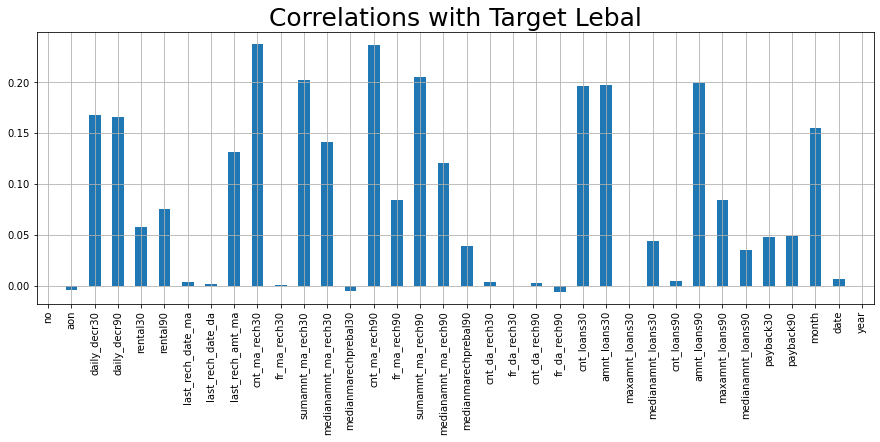

In [11]:
# correlation with target values

plt.figure(figsize=(15,5))
df.drop('label',axis=1).corrwith(df['label']).plot(kind='bar',grid=True)
plt.title('Correlations with Target Lebal',fontsize=25)
plt.show()

correlation is high columns(cnt_ma_rech30,cnt_ma_rech90) with target(loan) than other columns.

and also some column which have veri low relations with label.

In [12]:
# droping columns which have almost no relation with target.

df.drop(['year','no','pcircle'],axis=1,inplace=True)

In [13]:
df.shape

(209593, 37)

## Data Visualizations

### Univarite Anlysis

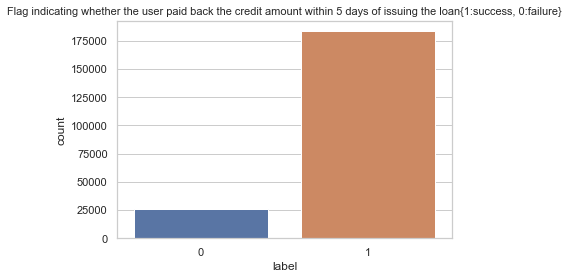

1    183431
0     26162
Name: label, dtype: int64

In [14]:
# showing lebal Frequency

sns.set(style=('whitegrid'))
sns.countplot(df['label'])
plt.title('Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}',fontsize=11)
plt.show()
df['label'].value_counts()

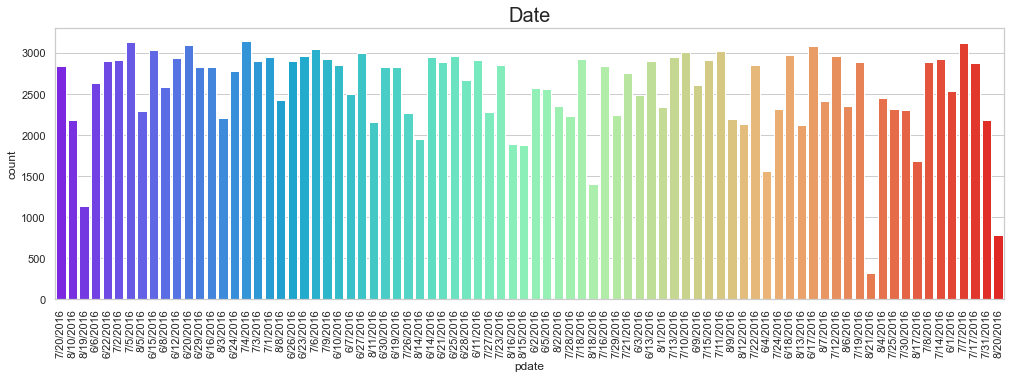

7/4/2016     3150
7/5/2016     3127
7/7/2016     3116
6/20/2016    3099
6/17/2016    3082
             ... 
6/4/2016     1559
8/18/2016    1407
8/19/2016    1132
8/20/2016     788
8/21/2016     324
Name: pdate, Length: 82, dtype: int64

In [15]:
# showing Frequency

plt.figure(figsize=(17,5))
sns.countplot(x='pdate',data=df,palette='rainbow')
plt.title('Date',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()
df['pdate'].value_counts()

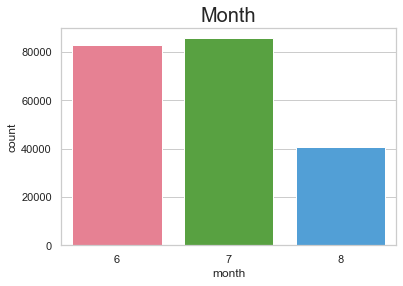

7    85765
6    83154
8    40674
Name: month, dtype: int64

In [16]:
# showing month Frequency

sns.set(style=('whitegrid'))
sns.countplot(df['month'],palette='husl')
plt.title('Month',fontsize=20)
plt.show()
df['month'].value_counts()

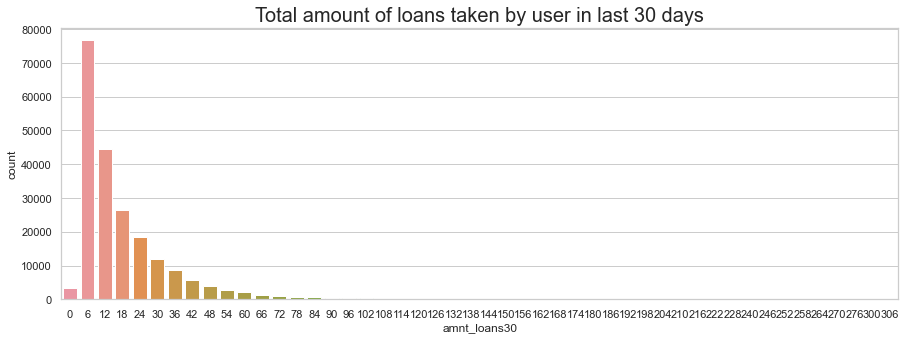

6      76620
12     44384
18     26379
24     18403
30     11999
36      8559
42      5580
48      3994
0       3259
54      2660
60      2043
66      1402
72      1101
78       742
84       580
90       394
96       333
102      252
108      182
114      135
120      119
132       92
126       80
138       64
156       34
144       30
150       30
162       29
168       20
174       17
186       15
180       13
192        7
198        6
210        4
252        4
228        4
216        4
276        3
222        3
264        3
258        3
204        2
240        2
300        1
270        1
306        1
246        1
Name: amnt_loans30, dtype: int64


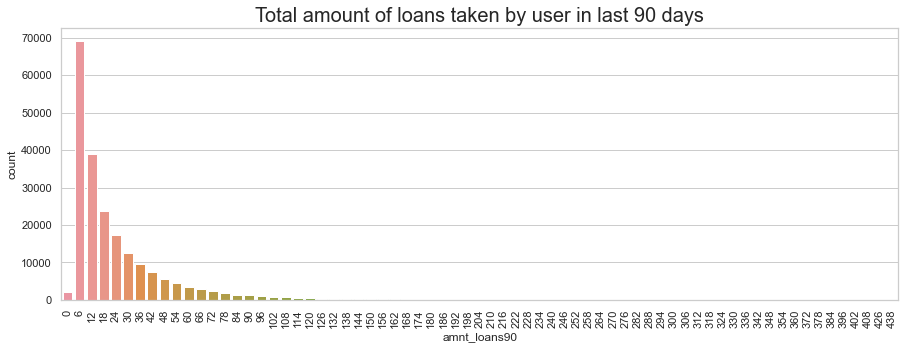

6      69131
12     38908
18     23867
24     17216
30     12503
       ...  
360        1
426        1
396        1
438        1
342        1
Name: amnt_loans90, Length: 69, dtype: int64


In [17]:
# showing Frequency

plt.figure(figsize=(15,5))
sns.countplot(df['amnt_loans30'])
plt.title('Total amount of loans taken by user in last 30 days',fontsize=20)
plt.show()
print(df['amnt_loans30'].value_counts())

# showing Frequency

plt.figure(figsize=(15,5))
sns.countplot(df['amnt_loans90'])
plt.title('Total amount of loans taken by user in last 90 days',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()
print(df['amnt_loans90'].value_counts())

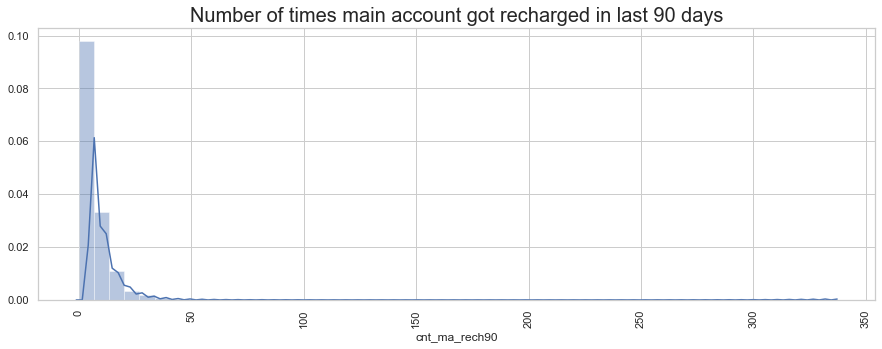

1      27898
2      24052
0      20950
3      20446
4      17329
       ...  
151        1
336        1
121        1
172        1
127        1
Name: cnt_ma_rech90, Length: 110, dtype: int64


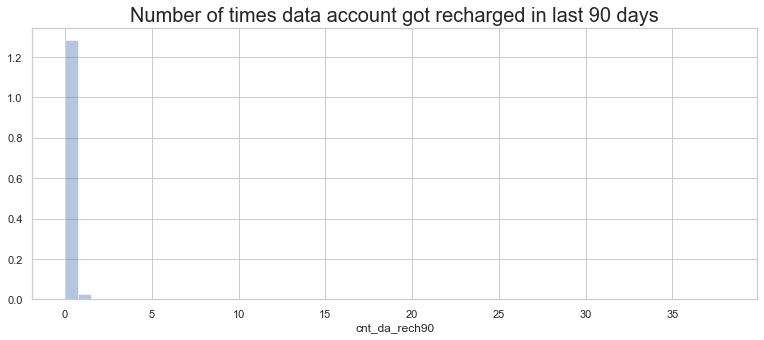

0     204226
1       4173
2        556
3        227
4        150
5         74
6         49
7         36
8         30
9         18
14        10
12         7
11         7
10         6
13         6
16         4
18         3
15         2
30         1
17         1
19         1
20         1
22         1
25         1
27         1
28         1
38         1
Name: cnt_da_rech90, dtype: int64


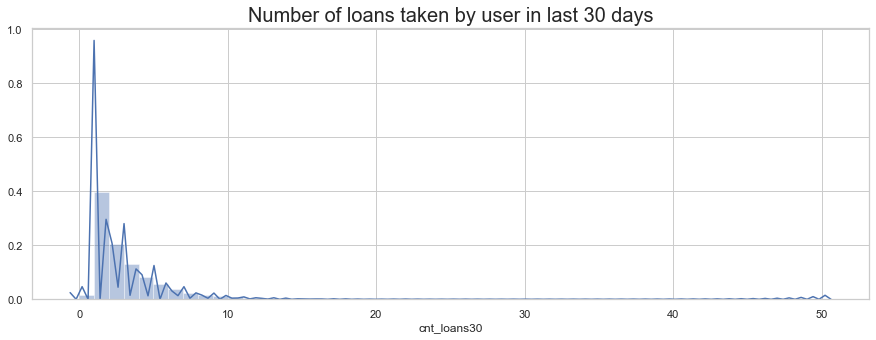

1     83432
2     42665
3     27050
4     17499
5     11673
6      7773
7      5041
8      3384
0      3259
9      2273
10     1571
11     1143
12      793
13      547
14      383
15      270
16      213
17      164
18       98
19       77
20       54
21       45
22       42
23       38
25       19
26       17
27       15
24       13
29        9
31        8
28        7
30        4
32        4
33        3
38        2
41        1
44        1
36        1
35        1
50        1
Name: cnt_loans30, dtype: int64


In [18]:
# showing Frequency

plt.figure(figsize=(15,5))
sns.distplot(df['cnt_ma_rech90'])
plt.title('Number of times main account got recharged in last 90 days',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()
print(df['cnt_ma_rech90'].value_counts())

# showing Frequency

plt.figure(figsize=(13,5))
sns.distplot(df['cnt_da_rech90'])
plt.title('Number of times data account got recharged in last 90 days',fontsize=20)
plt.show()
print(df['cnt_da_rech90'].value_counts())

# showing Frequency

plt.figure(figsize=(15,5))
sns.distplot(df['cnt_loans30'])
plt.title('Number of loans taken by user in last 30 days',fontsize=20)
plt.show()
print(df['cnt_loans30'].value_counts())

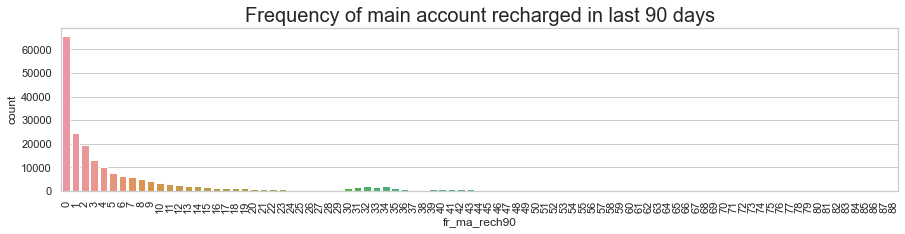

0     65753
1     24373
2     19285
3     13192
4     10021
      ...  
80        7
81        7
88        5
84        4
87        1
Name: fr_ma_rech90, Length: 89, dtype: int64

In [19]:
# showing Frequency
plt.figure(figsize=(15,3))
sns.countplot(df['fr_ma_rech90'])
plt.title('Frequency of main account recharged in last 90 days',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()
df['fr_ma_rech90'].value_counts()

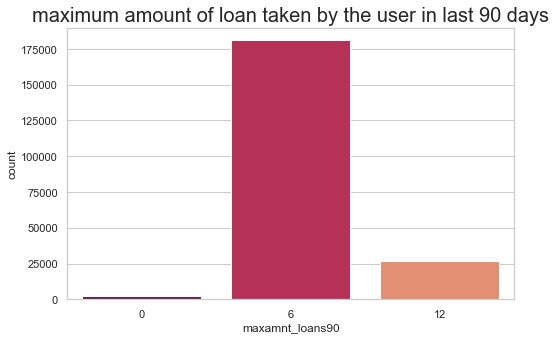

6     180945
12     26605
0       2043
Name: maxamnt_loans90, dtype: int64

In [20]:
# showing Frequency

plt.figure(figsize=(8,5))
sns.countplot(df['maxamnt_loans90'],palette='rocket')
plt.title('maximum amount of loan taken by the user in last 90 days',fontsize=20)
plt.show()
df['maxamnt_loans90'].value_counts()

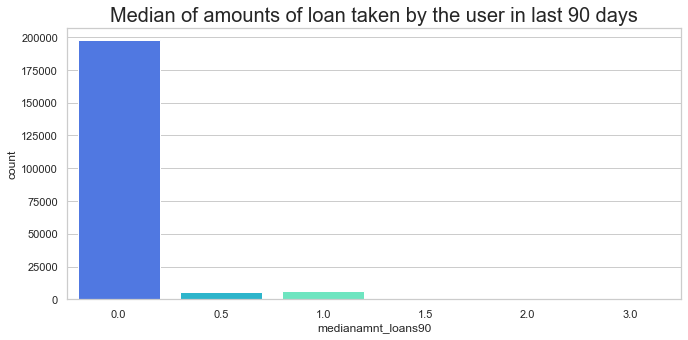

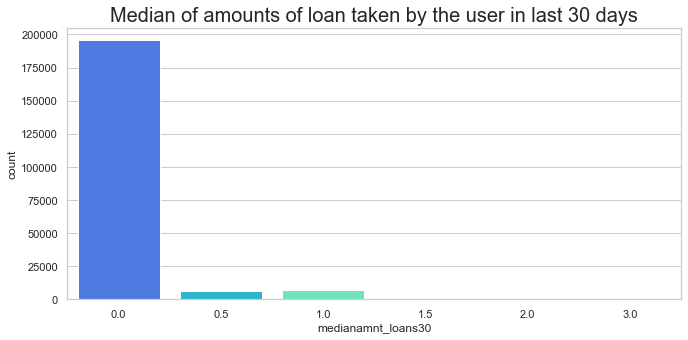

0.0    195445
1.0      7149
0.5      6538
2.0       420
1.5        38
3.0         3
Name: medianamnt_loans30, dtype: int64

In [21]:
# showing Frequency

plt.figure(figsize=(11,5))
sns.countplot(df['medianamnt_loans90'],palette='rainbow')
plt.title('Median of amounts of loan taken by the user in last 90 days',fontsize=20)
plt.show()
df['medianamnt_loans90'].value_counts()

# showing Frequency

plt.figure(figsize=(11,5))
sns.countplot(df['medianamnt_loans30'],palette='rainbow')
plt.title('Median of amounts of loan taken by the user in last 30 days',fontsize=20)
plt.show()
df['medianamnt_loans30'].value_counts()

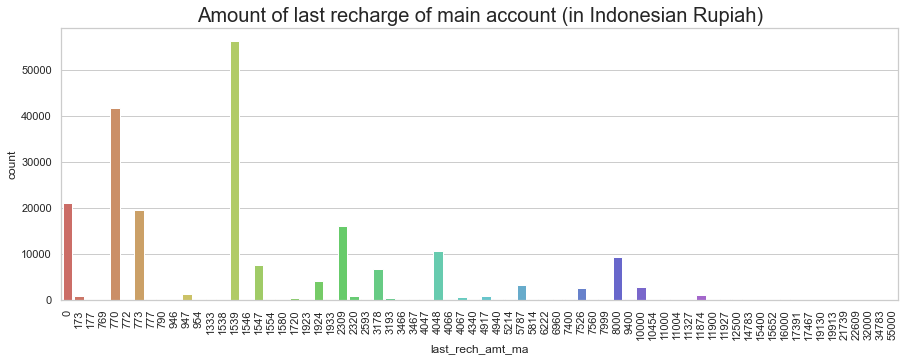

1539     56297
770      41766
0        20995
773      19523
2309     16113
         ...  
19913        1
10454        1
14783        1
4066         1
22609        1
Name: last_rech_amt_ma, Length: 70, dtype: int64

In [22]:
# showing Frequency

plt.figure(figsize=(15,5))
sns.countplot(df['last_rech_amt_ma'],palette='hls')
plt.title('Amount of last recharge of main account (in Indonesian Rupiah)',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()
df['last_rech_amt_ma'].value_counts()

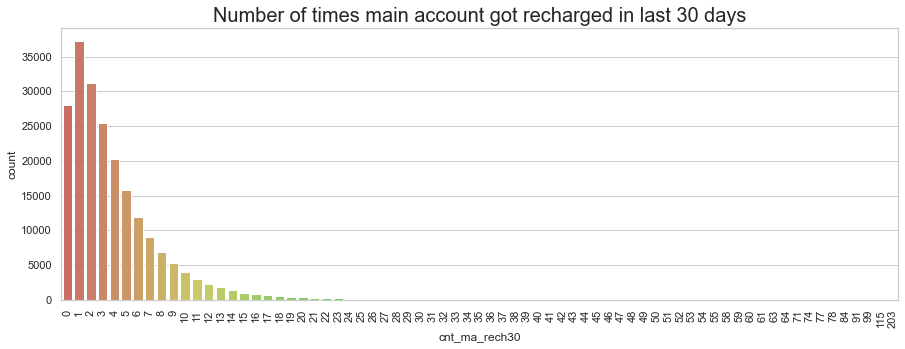

In [23]:
# showing Frequency

plt.figure(figsize=(15,5))
sns.countplot(df['cnt_ma_rech30'],palette='hls')
plt.title('Number of times main account got recharged in last 30 days',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

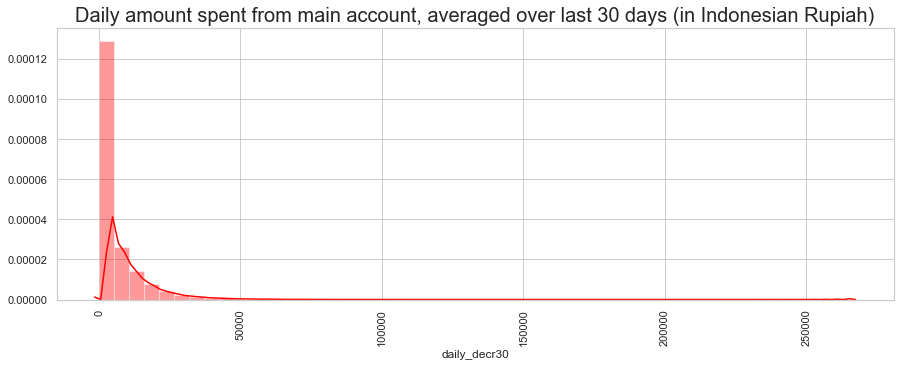

In [24]:
# checking distribution

plt.figure(figsize=(15,5))
sns.distplot(df['daily_decr30'],color='red')
plt.title('Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

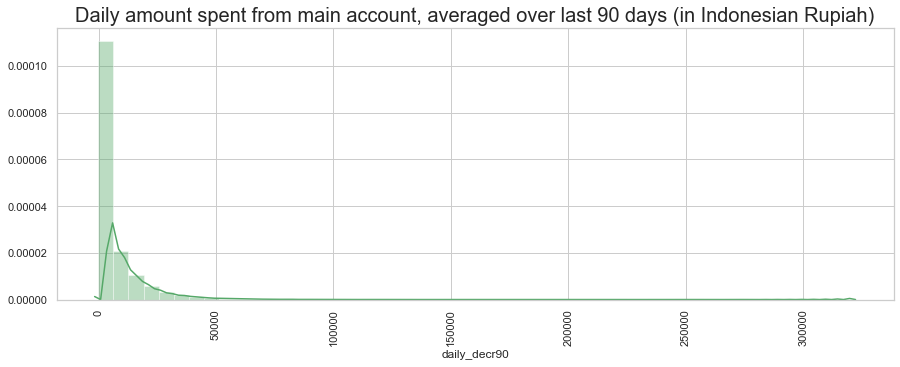

In [25]:
# checking distribution

plt.figure(figsize=(15,5))
sns.distplot(df['daily_decr90'],color='g')
plt.title('Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

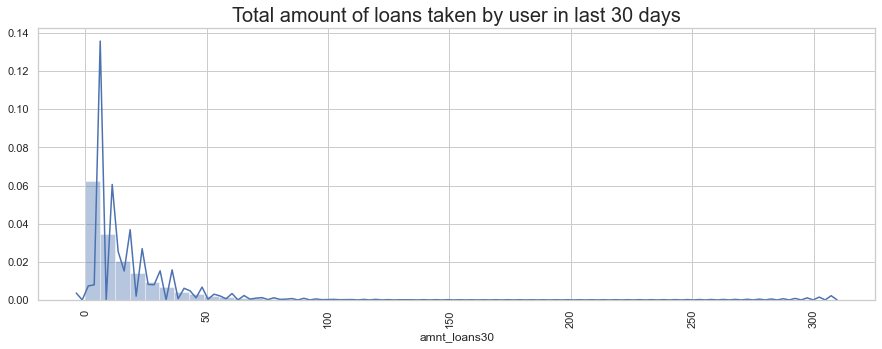

In [26]:
# checking distribution

plt.figure(figsize=(15,5))
sns.distplot(df['amnt_loans30'])
plt.title('Total amount of loans taken by user in last 30 days',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()

### Bivariate Analysis

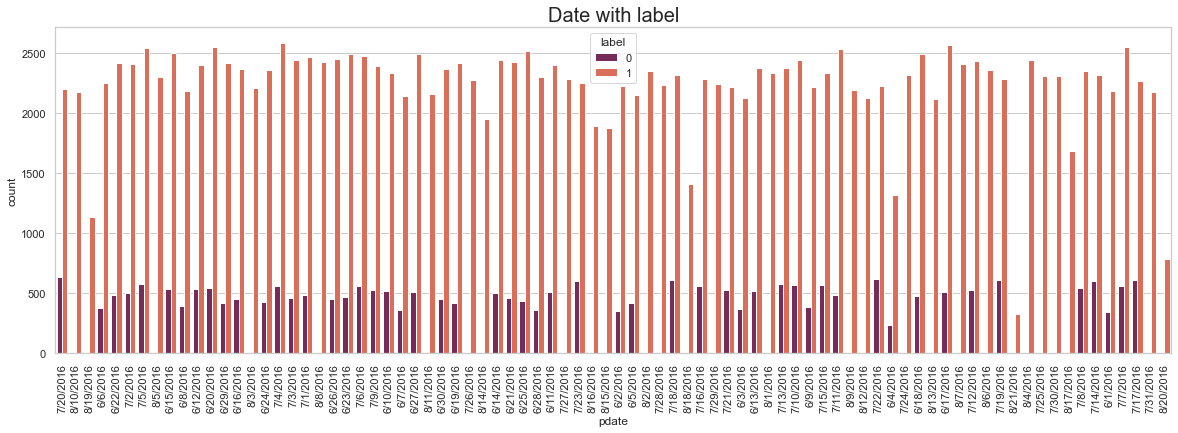

pdate      label
6/1/2016   1        2187
           0         348
6/10/2016  1        2335
           0         523
6/11/2016  1        2400
                    ... 
8/5/2016   1        2298
8/6/2016   1        2358
8/7/2016   1        2408
8/8/2016   1        2428
8/9/2016   1        2191
Name: label, Length: 135, dtype: int64


In [27]:
# showing coutplot

plt.figure(figsize=(20,6))
sns.countplot(x='pdate',hue='label',data=df,palette='rocket')
plt.title('Date with label',fontsize=20)
plt.xticks(rotation="vertical")
plt.show()

print(df.groupby('pdate')['label'].value_counts()
     )

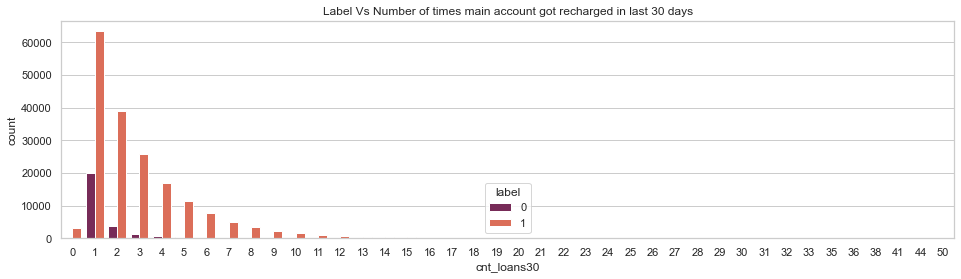

cnt_loans30  label
0            1         3259
1            1        63431
             0        20001
2            1        38927
             0         3738
3            1        25761
             0         1289
4            1        16943
             0          556
5            1        11422
             0          251
6            1         7653
             0          120
7            1         4967
             0           74
8            1         3340
             0           44
9            1         2249
             0           24
10           1         1552
             0           19
11           1         1134
             0            9
12           1          781
             0           12
13           1          539
             0            8
14           1          377
             0            6
15           1          269
             0            1
16           1          210
             0            3
17           1          161
             0            3
1

In [28]:
# compare with target

plt.figure(figsize=(16,4))
sns.countplot(x='cnt_loans30',hue='label',data=df,palette='rocket')
plt.title('Label Vs Number of times main account got recharged in last 30 days',fontsize=12)
plt.show()

print(df.groupby('cnt_loans30')['label'].value_counts())

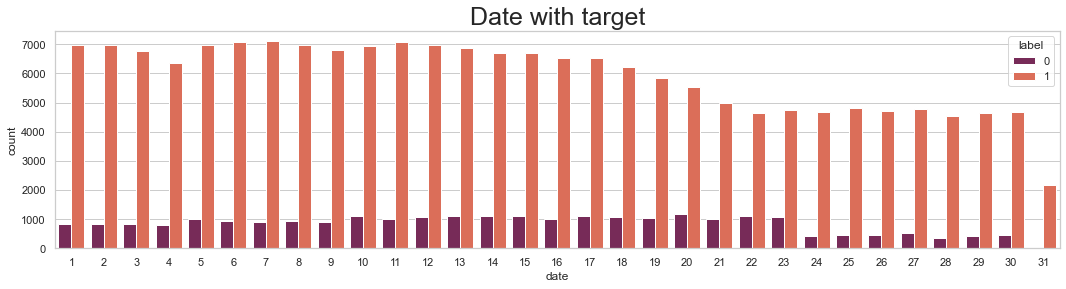

date  label
1     1        6990
      0         834
2     1        6988
      0         851
3     1        6780
               ... 
29    1        4659
      0         418
30    1        4675
      0         454
31    1        2178
Name: label, Length: 61, dtype: int64


In [29]:
# compare with target

plt.figure(figsize=(18,4))
sns.countplot(x='date',hue='label',data=df,palette='rocket')
plt.title('Date with target',fontsize=25)
plt.show()

print(df.groupby('date')['label'].value_counts())

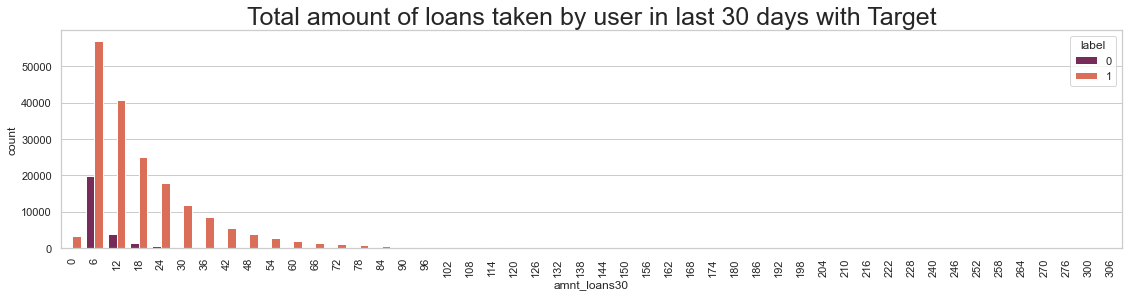

amnt_loans30  label
0             1         3259
6             1        56965
              0        19655
12            1        40591
              0         3793
                       ...  
264           1            3
270           1            1
276           1            3
300           1            1
306           1            1
Name: label, Length: 68, dtype: int64

In [30]:
# compare with target

plt.figure(figsize=(19,4))
sns.countplot(x='amnt_loans30',hue='label',data=df,palette='rocket')
plt.title('Total amount of loans taken by user in last 30 days with Target',fontsize=25)
plt.xticks(rotation='vertical')
plt.show()

df.groupby('amnt_loans30')['label'].value_counts()

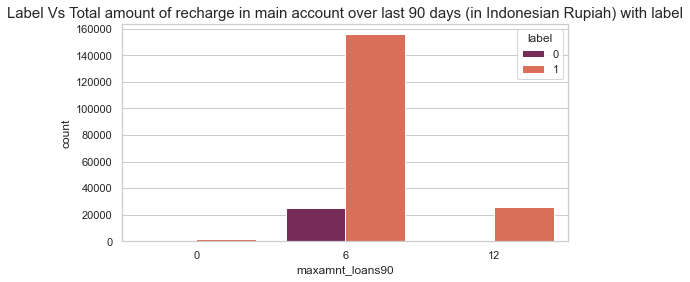

maxamnt_loans90  label
0                1          2043
6                1        155805
                 0         25140
12               1         25583
                 0          1022
Name: label, dtype: int64

In [31]:
# compare with target

plt.figure(figsize=(8,4))
sns.countplot(x='maxamnt_loans90',hue='label',data=df,palette='rocket')
plt.title('Label Vs Total amount of recharge in main account over last 90 days (in Indonesian Rupiah) with label',fontsize=15)
plt.show()

df.groupby('maxamnt_loans90')['label'].value_counts()

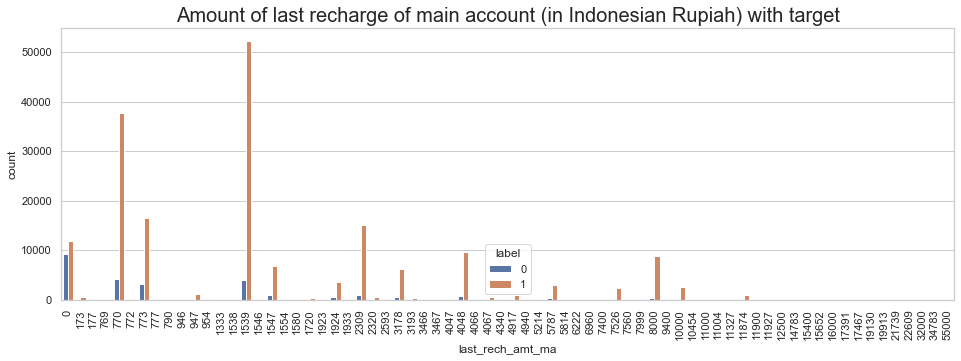

last_rech_amt_ma  label
0                 1        11805
                  0         9190
173               1          636
                  0          175
177               1            5
                           ...  
32000             1           22
                  0           10
34783             1            1
55000             1           20
                  0            8
Name: label, Length: 121, dtype: int64

In [32]:
# frequncy with target

plt.figure(figsize=(16,5))
sns.countplot(x='last_rech_amt_ma',hue='label',data=df)
plt.title('Amount of last recharge of main account (in Indonesian Rupiah) with target',fontsize=20)
plt.xticks(rotation='vertical')
plt.show()
df.groupby('last_rech_amt_ma')['label'].value_counts()

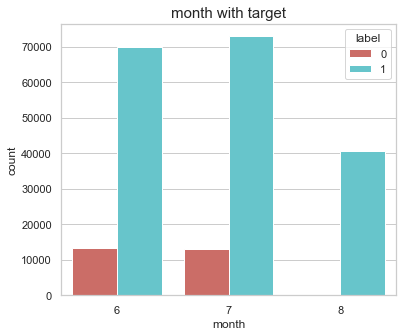

month  label
6      1        69893
       0        13261
7      1        72864
       0        12901
8      1        40674
Name: label, dtype: int64

In [33]:
# frequncies with target
plt.figure(figsize=(6,5))
sns.countplot(x='month',hue='label',data=df,palette='hls')
plt.title('month with target',fontsize=15)
plt.show()

df.groupby('month')['label'].value_counts()

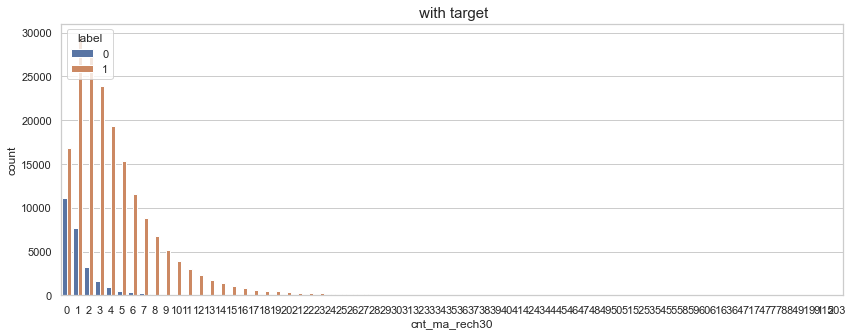

cnt_ma_rech30  label
0              1        16856
               0        11123
1              1        29561
               0         7677
2              1        27936
                        ...  
84             1            1
91             1            1
99             1            1
115            1            1
203            1            1
Name: label, Length: 103, dtype: int64


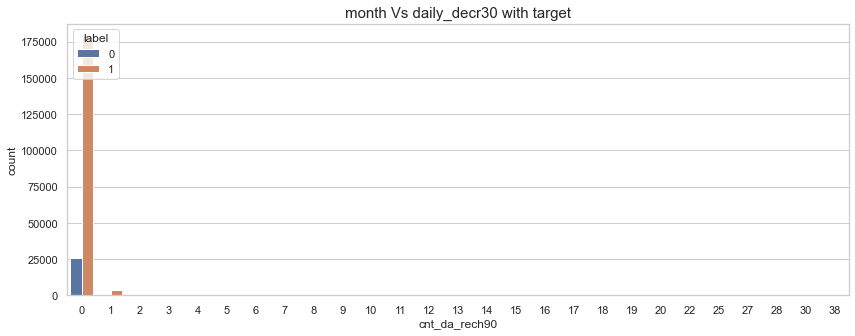

cnt_da_rech90  label
0              1        178530
               0         25696
1              1          3884
               0           289
2              1           483
               0            73
3              1           184
               0            43
4              1           128
               0            22
5              1            66
               0             8
6              1            43
               0             6
7              1            31
               0             5
8              1            24
               0             6
9              1            13
               0             5
10             1             6
11             1             6
               0             1
12             1             5
               0             2
13             1             6
14             1             9
               0             1
15             0             1
               1             1
16             1             3
               0  

In [34]:
# frequncy with target
plt.figure(figsize=(14,5))
sns.countplot(x='cnt_ma_rech30',hue='label',data=df)
plt.title(' with target',fontsize=15)
plt.show()

print(df.groupby('cnt_ma_rech30')['label'].value_counts())

# frequncy with target
plt.figure(figsize=(14,5))
sns.countplot(x='cnt_da_rech90',hue='label',data=df)
plt.title('month Vs daily_decr30 with target',fontsize=15)
plt.show()

print(df.groupby('cnt_da_rech90')['label'].value_counts())



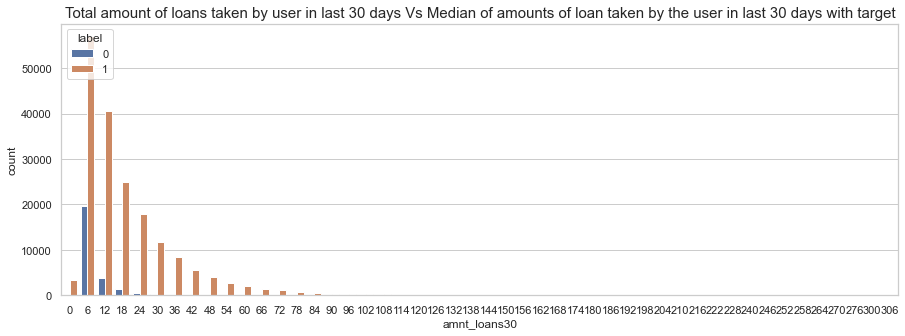

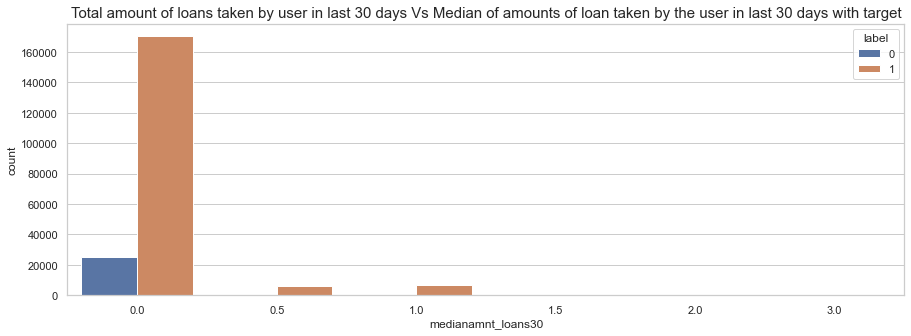

In [35]:
# compare with target
plt.figure(figsize=(15,5))
sns.countplot(x='amnt_loans30',hue='label',data=df)
plt.title('Total amount of loans taken by user in last 30 days Vs Median of amounts of loan taken by the user in last 30 days with target',fontsize=15)
plt.show()

# compare with target
plt.figure(figsize=(15,5))
sns.countplot(hue='label',x='medianamnt_loans30',data=df)
plt.title('Total amount of loans taken by user in last 30 days Vs Median of amounts of loan taken by the user in last 30 days with target',fontsize=15)
plt.show()

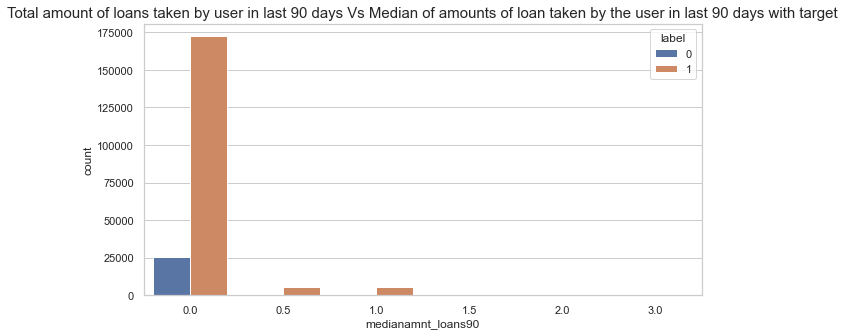

medianamnt_loans90  label
0.0                 1        172194
                    0         25230
0.5                 1          5221
                    0           447
1.0                 1          5687
                    0           485
1.5                 1            19
2.0                 1           307
3.0                 1             3
Name: label, dtype: int64


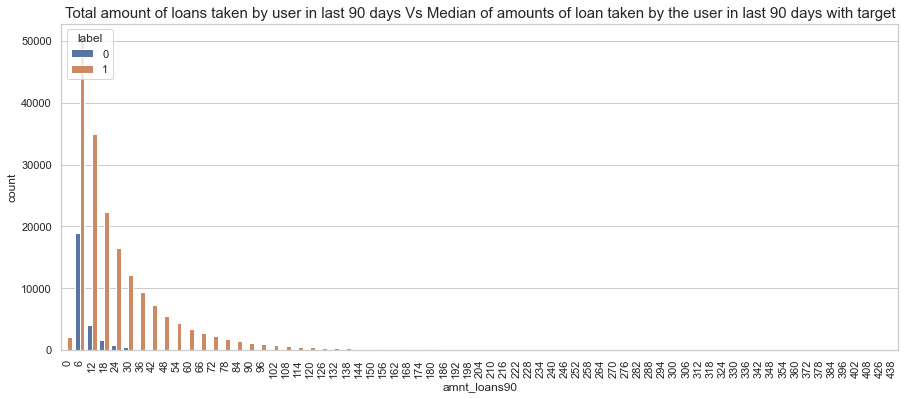

amnt_loans90  label
0             1         2043
6             1        50284
              0        18847
12            1        34941
              0         3967
                       ...  
396           1            1
402           1            1
408           1            4
426           1            1
438           1            1
Name: label, Length: 95, dtype: int64


In [36]:
# compare with target
plt.figure(figsize=(10,5))
sns.countplot(x='medianamnt_loans90',hue='label',data=df)
plt.title('Total amount of loans taken by user in last 90 days Vs Median of amounts of loan taken by the user in last 90 days with target',fontsize=15)
plt.show()

print(df.groupby('medianamnt_loans90')['label'].value_counts())

# compare with target
plt.figure(figsize=(15,6))
sns.countplot(x='amnt_loans90',hue='label',data=df)
plt.title('Total amount of loans taken by user in last 90 days Vs Median of amounts of loan taken by the user in last 90 days with target',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('amnt_loans90')['label'].value_counts())

In [37]:
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,month,date
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,0.0,2.0,12,6,0.0,29.000000,29.000000,7/20/2016,7,20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,0.0,1.0,12,12,0.0,0.000000,0.000000,8/10/2016,8,10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,0.0,1.0,6,6,0.0,0.000000,0.000000,8/19/2016,8,19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,0.0,2.0,12,6,0.0,0.000000,0.000000,6/6/2016,6,6
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,0.0,7.0,42,6,0.0,2.333333,2.333333,6/22/2016,6,22


In [38]:
# spliping contect no into first 5 and last 5 by I

df[['first5','last5']]=df.msisdn.str.split('I',expand=True)
df[['first5','last5']]=df[['first5','last5']].astype(int)
print(df.shape)
print(df.dtypes)

(209593, 39)
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           i

In [39]:
# droping object type column

df.drop(['msisdn','pdate'],axis=1,inplace=True)
df.shape


(209593, 37)

## Removing Outliers

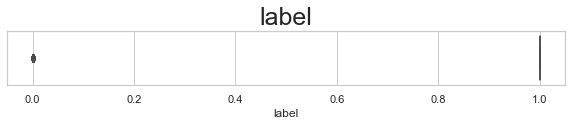

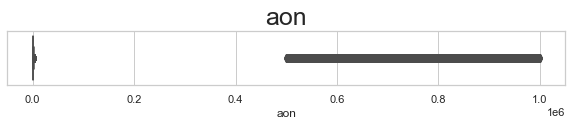

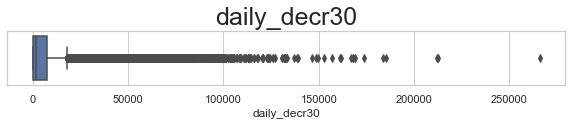

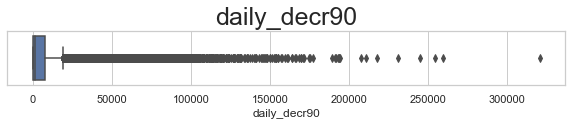

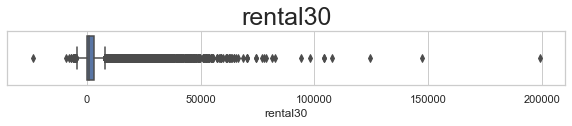

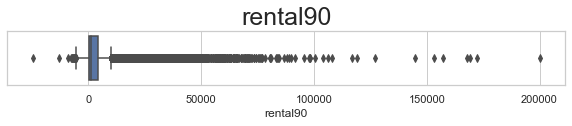

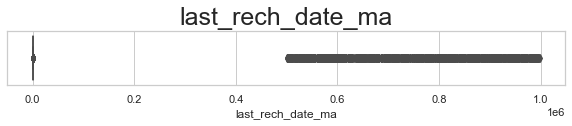

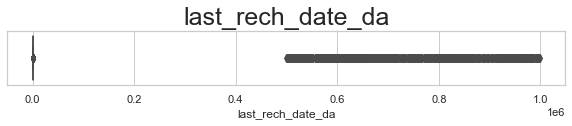

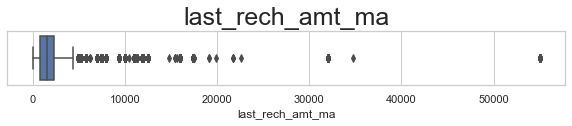

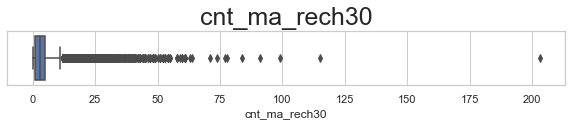

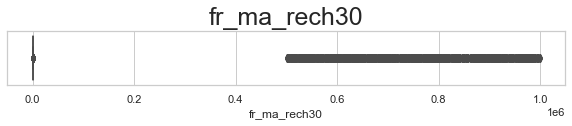

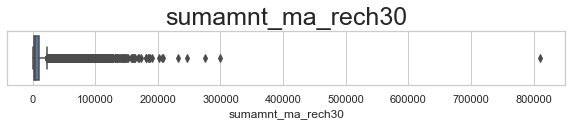

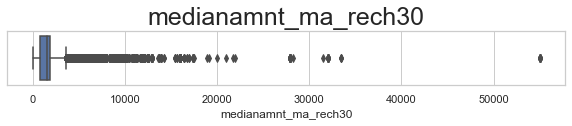

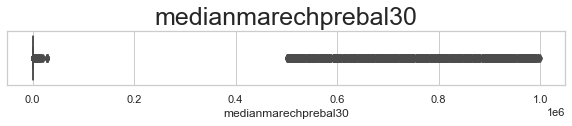

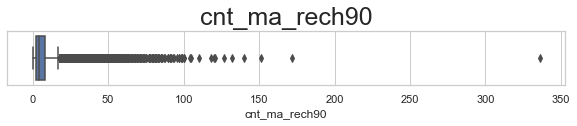

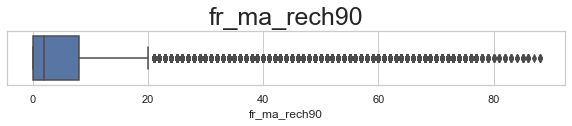

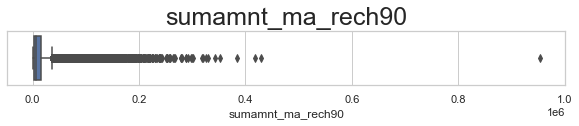

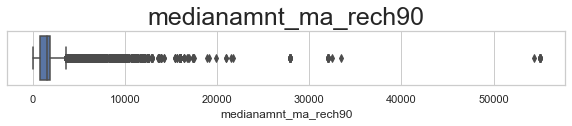

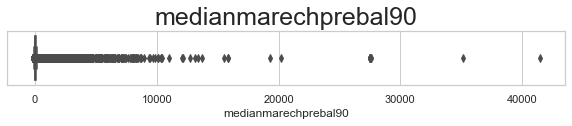

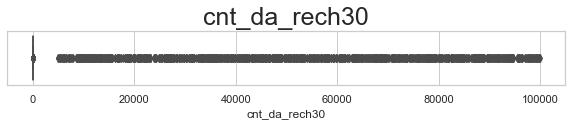

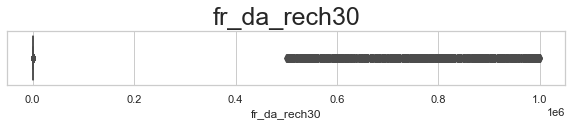

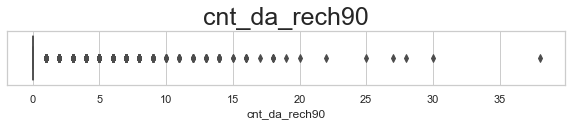

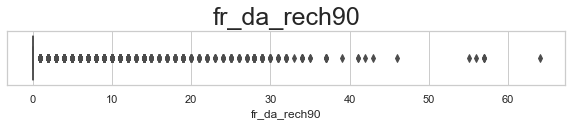

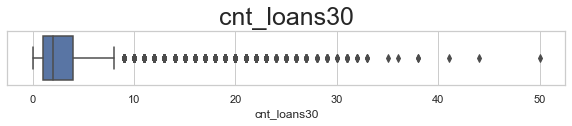

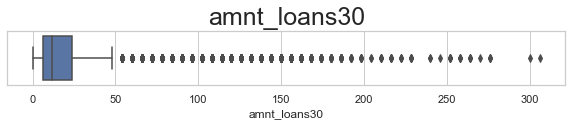

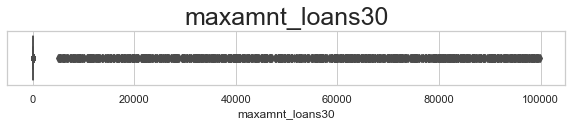

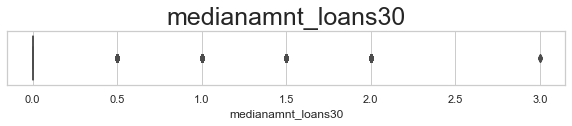

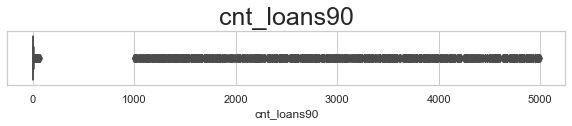

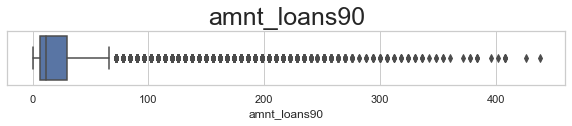

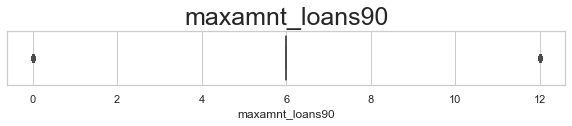

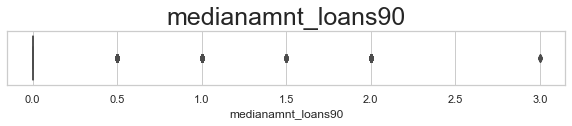

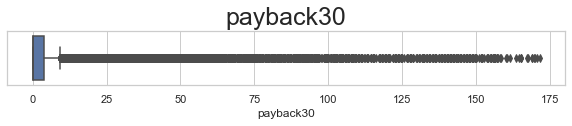

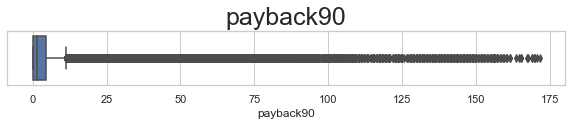

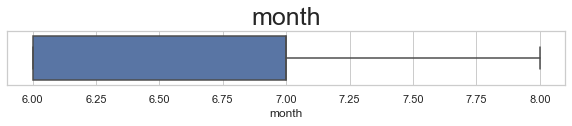

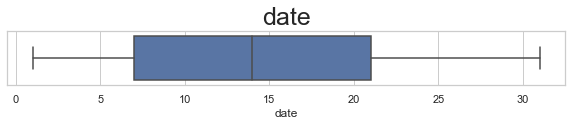

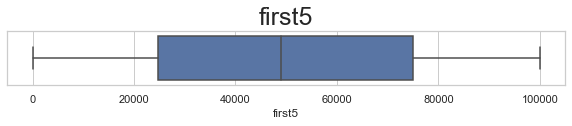

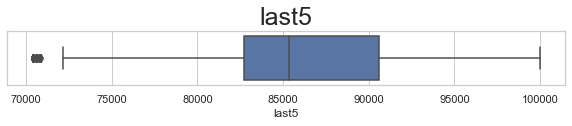

In [40]:
# ploting outliers with boxplot

for i in df.columns:
    plt.figure(figsize=(10,1))
    sns.boxplot(df[i])
    plt.title(i,fontsize=25)
    plt.show()

In [41]:
# ploting outliers 

Z=np.abs(zscore(df))
print(np.where(Z>5))

(array([    30,     53,     65, ..., 209533, 209550, 209576], dtype=int64), array([ 6,  6,  1, ...,  6, 28,  1], dtype=int64))


In [42]:
df_new=df[(Z<5).all(axis=1)]
df_new.shape

(190496, 37)

In [43]:
df_new.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
month                   0
date                    0
first5                  0
last5                   0
dtype: int64

## Dealing with skewness

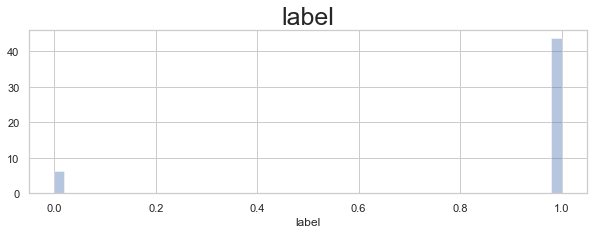

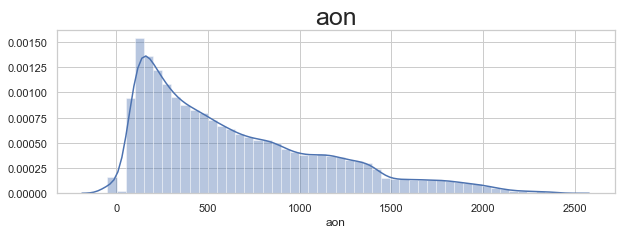

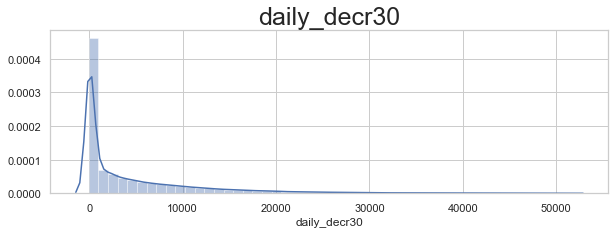

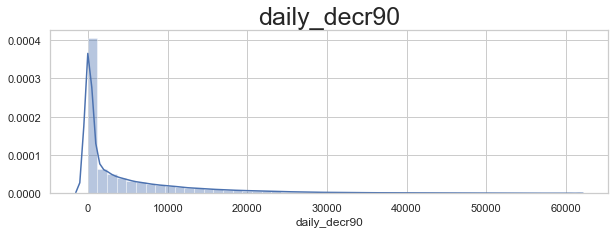

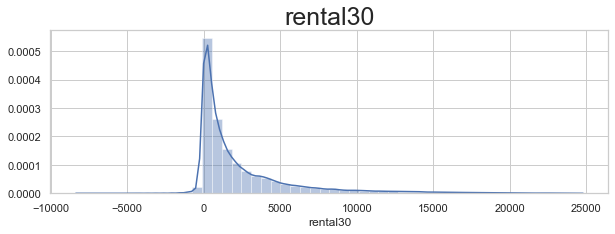

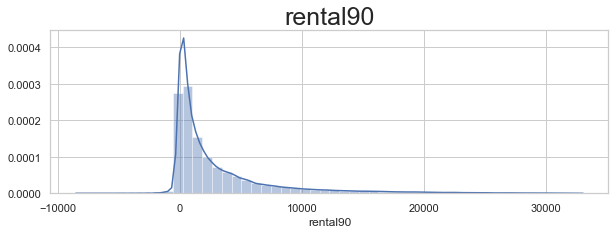

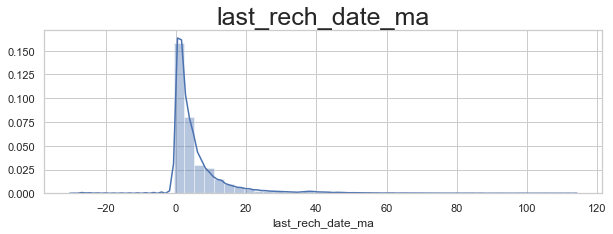

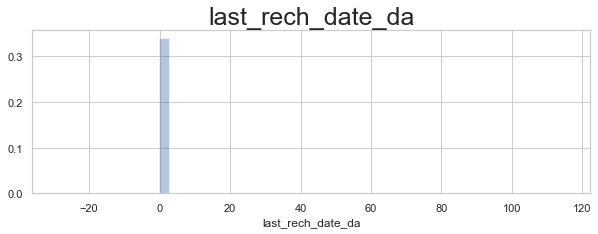

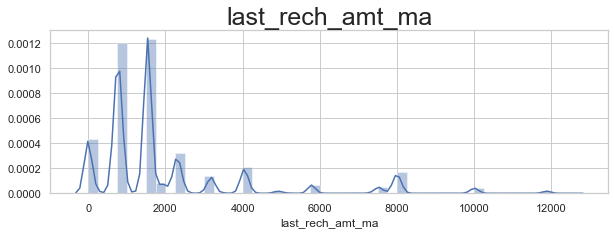

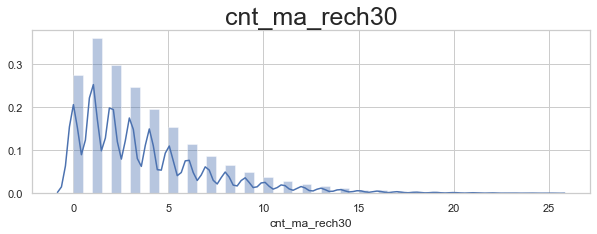

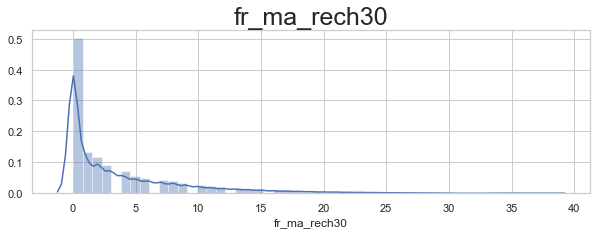

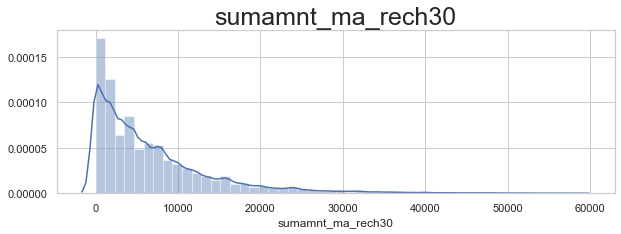

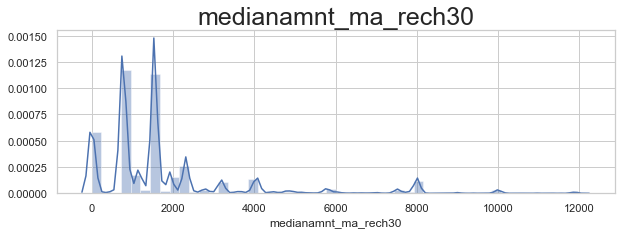

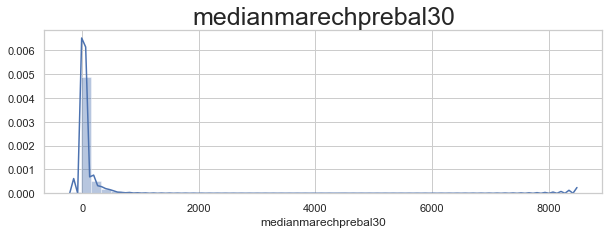

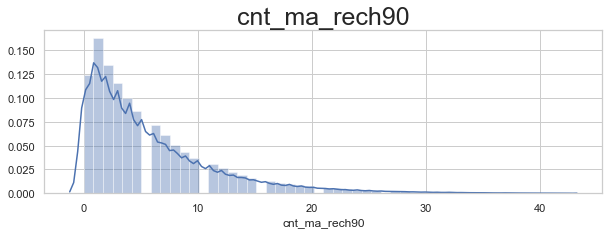

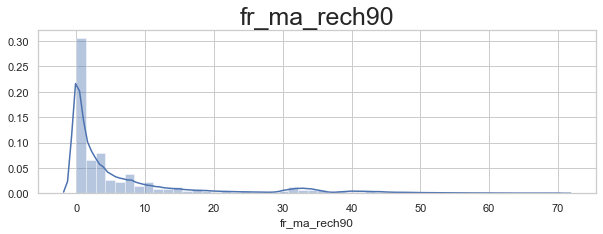

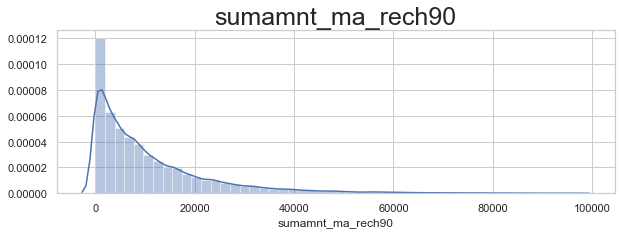

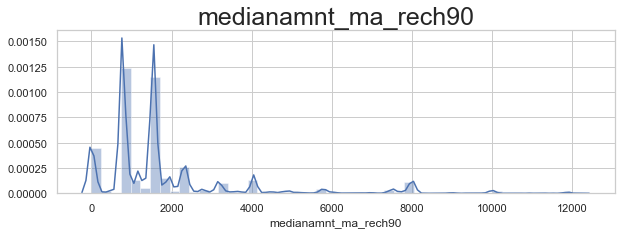

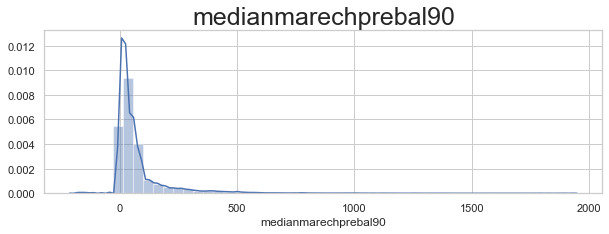

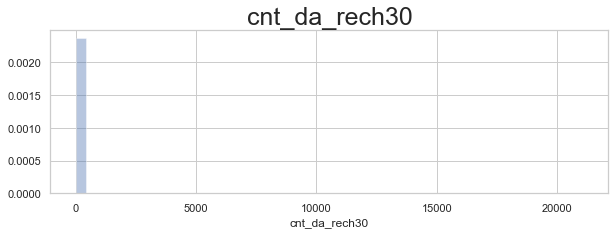

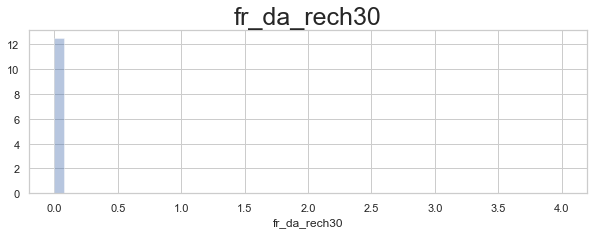

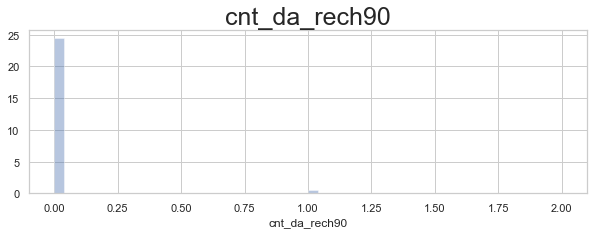

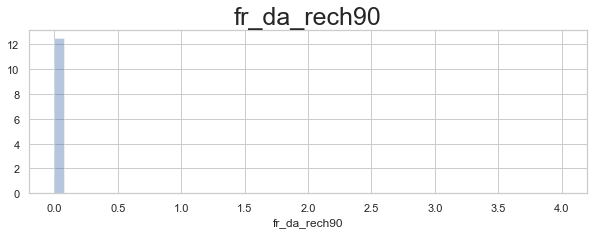

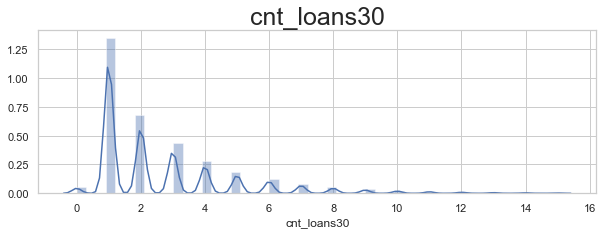

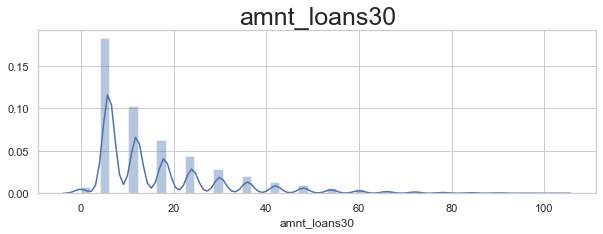

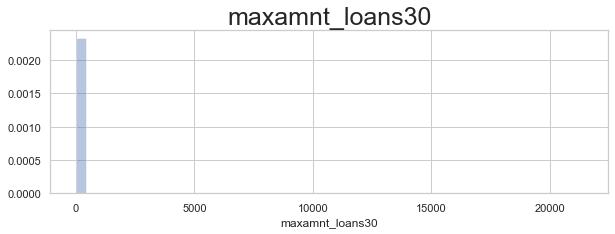

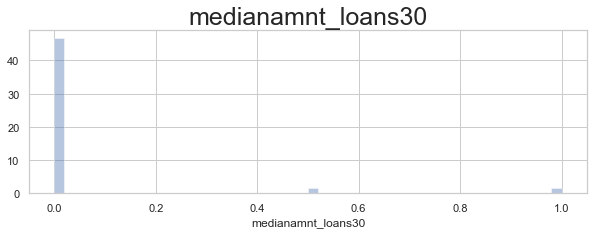

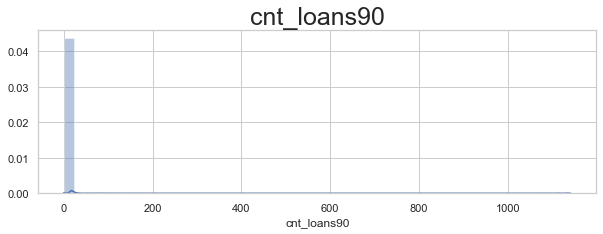

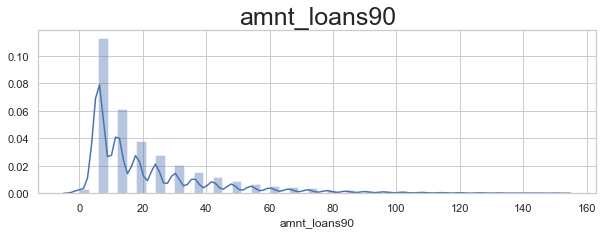

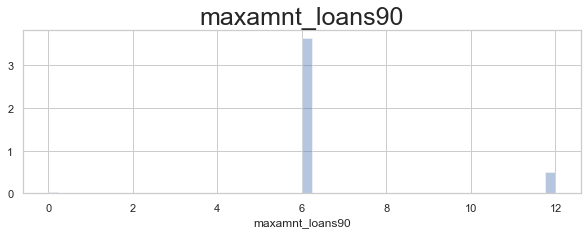

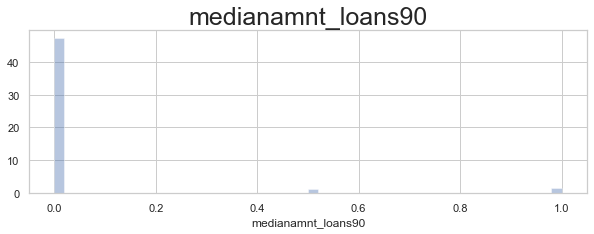

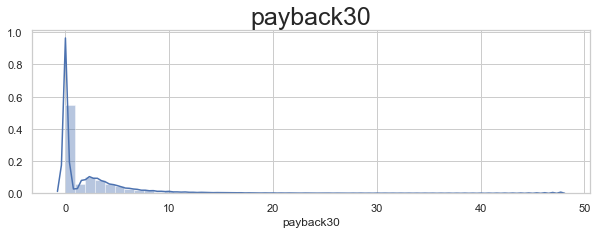

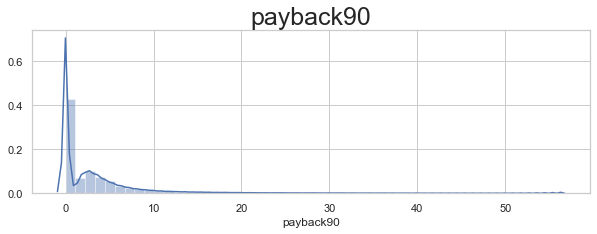

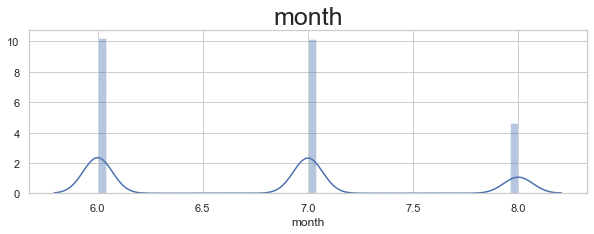

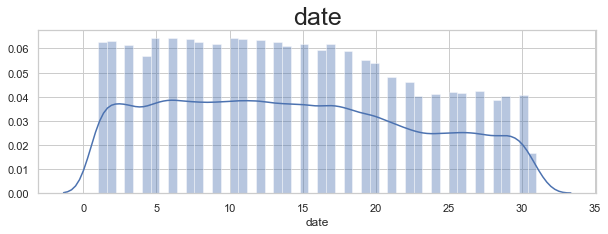

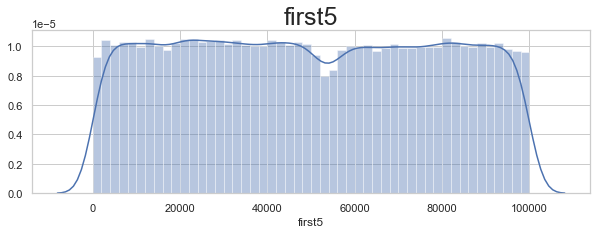

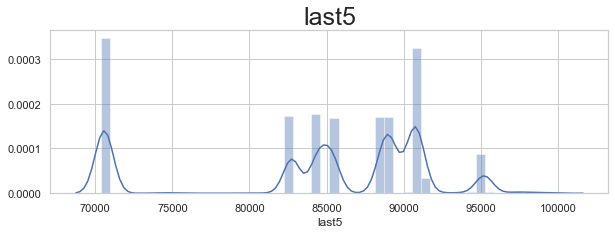

In [44]:
# ploting distribution plot

for i in df_new.columns:
    plt.figure(figsize=(10,3))
    sns.distplot(df_new[i])
    plt.title(i,fontsize=25)
    plt.show()

In [45]:
df.iloc[:,19:40]

,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month,date,first5,last5
0,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20,21408,70789
1,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8,10,76462,70374
2,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19,17943,70372
3,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6,55773,70781
4,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22,3813,82730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17,22758,85348
209589,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,6,12,95583,84455
209590,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29,28556,85350
209591,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25,59712,82733


In [46]:
# see skewness
df_new.skew()

label                   -2.241079
aon                      0.948834
daily_decr30             2.285489
daily_decr90             2.421275
rental30                 2.477727
rental90                 2.608359
last_rech_date_ma        3.091235
last_rech_date_da        9.986228
last_rech_amt_ma         2.219151
cnt_ma_rech30            1.653280
fr_ma_rech30             2.005131
sumamnt_ma_rech30        2.070696
medianamnt_ma_rech30     2.442765
medianmarechprebal30    10.719225
cnt_ma_rech90            1.798712
fr_ma_rech90             2.176993
sumamnt_ma_rech90        2.161715
medianamnt_ma_rech90     2.460280
medianmarechprebal90     4.848900
cnt_da_rech30           37.468414
fr_da_rech30            93.522733
cnt_da_rech90            7.439889
fr_da_rech90            73.829813
cnt_loans30              1.873190
amnt_loans30             1.886464
maxamnt_loans30         40.712098
medianamnt_loans30       4.077140
cnt_loans90             71.590329
amnt_loans90             2.125957
maxamnt_loans9

In [47]:
df_new.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
month                   0
date                    0
first5                  0
last5                   0
dtype: int64

In [48]:
# drop because for more than 90% zero value.

df_new.drop(['last_rech_date_da','cnt_da_rech30'],axis=1,inplace=True)
df_new.drop(['fr_da_rech30','fr_da_rech90','cnt_da_rech90'],axis=1,inplace=True)

# Model Training

In [49]:
# importing model libraries

import sklearn
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# importing libraries for spliting data into train and test

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# importing metrics

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

# importing library for standardization

from sklearn.preprocessing import StandardScaler

In [50]:
# spliting dataset into input/output

y=df_new['label']
X=df_new.drop('label',axis=1)

# standeldization for input data
scaler=StandardScaler()
x=scaler.fit_transform(X)


# creating datafram
x=pd.DataFrame(x,columns=X.columns)
print(x)

             aon  daily_decr30  daily_decr90  rental30  rental90  \
0      -0.761899     -0.227825     -0.261887 -0.625218 -0.609335   
1       0.120088      1.025833      0.814835  0.369512  0.129817   
2      -0.234711     -0.456941     -0.460026 -0.430349 -0.471463   
3      -0.824039     -0.647302     -0.623653 -0.642616 -0.631031   
4       0.591150     -0.629412     -0.608275 -0.373387 -0.428643   
...          ...           ...           ...       ...       ...   
190491 -0.497303     -0.629239     -0.608127 -0.376170 -0.430735   
190492  0.847728     -0.645131     -0.621787 -0.193001 -0.293041   
190493  0.723448      0.987272      0.788641  0.991537  1.250447   
190494  2.164695      1.076471      0.868272 -0.570282 -0.453270   
190495  1.862013     -0.029508     -0.087219 -0.549623 -0.529397   

        last_rech_date_ma  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0               -0.415308         -0.209120      -0.482217      3.127184   
1                1.448872      

## Model Training

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> DecisionTreeClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.8825802116579876
Score: 0.9999720029116972
[[ 3390  2688]
 [ 2904 38642]]
              precision    recall  f1-score   support

           0       0.54      0.56      0.55      6078
           1       0.93      0.93      0.93     41546

    accuracy                           0.88     47624
   macro avg       0.74      0.74      0.74     47624
weighted avg       0.88      0.88      0.88     47624



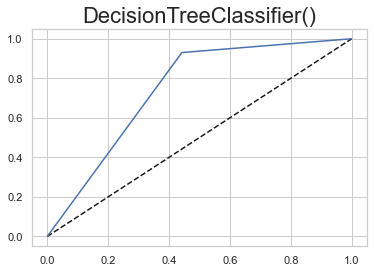

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> KNeighborsClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.8756509323030405
Score: 0.9102273363570189
[[ 2311  3767]
 [ 2155 39391]]
              precision    recall  f1-score   support

           0       0.52      0.38      0.44      6078
           1       0.91      0.95      0.93     41546

    accuracy                           0.88     47624
   macro avg       0.72      0.66      0.68     47624
weighted avg       0.86      0.88      0.87     47624



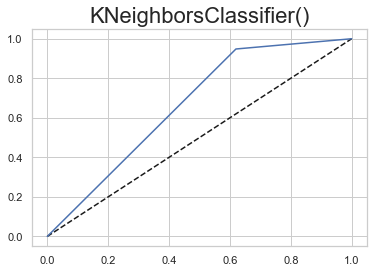

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> GaussianNB() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.6348689736267428
Score: 0.6353309255837393
[[ 5161   917]
 [16472 25074]]
              precision    recall  f1-score   support

           0       0.24      0.85      0.37      6078
           1       0.96      0.60      0.74     41546

    accuracy                           0.63     47624
   macro avg       0.60      0.73      0.56     47624
weighted avg       0.87      0.63      0.70     47624



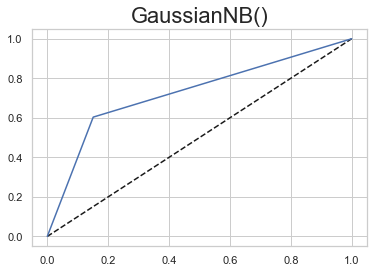

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> SVC() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.8898874517050227
Score: 0.8912943053922392
[[ 1905  4173]
 [ 1071 40475]]
              precision    recall  f1-score   support

           0       0.64      0.31      0.42      6078
           1       0.91      0.97      0.94     41546

    accuracy                           0.89     47624
   macro avg       0.77      0.64      0.68     47624
weighted avg       0.87      0.89      0.87     47624



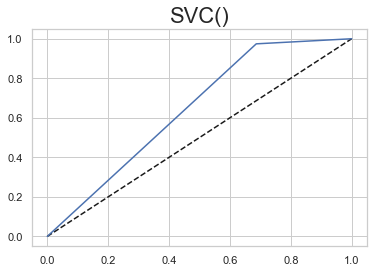

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> AdaBoostClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9071686544599362
Score: 0.9097163894954925
[[ 2307  3771]
 [  650 40896]]
              precision    recall  f1-score   support

           0       0.78      0.38      0.51      6078
           1       0.92      0.98      0.95     41546

    accuracy                           0.91     47624
   macro avg       0.85      0.68      0.73     47624
weighted avg       0.90      0.91      0.89     47624



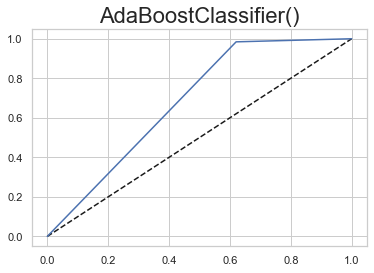

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> RandomForestClassifier() <<<<<<<<<<<<<<<<<<<<<<<<<<<<
AC: 0.9213211825970099
Score: 0.9999580043675458
[[ 3183  2895]
 [  852 40694]]
              precision    recall  f1-score   support

           0       0.79      0.52      0.63      6078
           1       0.93      0.98      0.96     41546

    accuracy                           0.92     47624
   macro avg       0.86      0.75      0.79     47624
weighted avg       0.92      0.92      0.91     47624



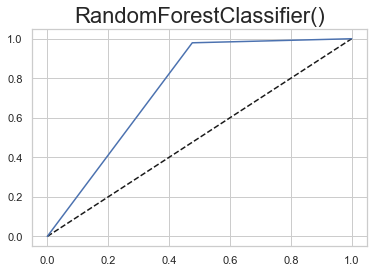

In [51]:
# splting data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Appying algorithms
models=[DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),SVC(),AdaBoostClassifier(),RandomForestClassifier()]
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>',i,'<<<<<<<<<<<<<<<<<<<<<<<<<<<<')
    print('AC:',accuracy_score(y_test,pred))
    print('Score:',i.score(x_train,y_train))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    
    # roc_courve
    fpr,tpr,thresholds=roc_curve(y_test,pred)
    plt.plot([0,1],[0,1],'--k')
    plt.plot(fpr,tpr,label=i)
    plt.title(i,fontsize=22)
    plt.show()

## Cross validation score

In [53]:
# create loop for all algorithms

cross=cross_val_score(RandomForestClassifier(),x,y,cv=5)

print(cross.mean())
print(cross)

------------ RandomForestClassifier() ------------
0.9207017416085279
[0.92173228 0.91910549 0.9199979  0.92175648 0.92091656]


## GridSearchCV

In [ ]:
# taking best model for best hyper parametrers
para={'n_estimators':[50,100,150,200,250],'criterion':['gini','entropy']}

grid=GridSearchCV(RandomForestClassifier(),para)
grid.fit(x_train,y_train)

print(grid.best_params_)

In [ ]:
# create final model

rfc=RandomForestClassifier(n_estimators=250,criterion="entropy")
rfc.fit(x_train,y_train) 
pred=rfc.predict(x_test)
print('AC:',accuracy_score(y_test,pred))
print('Score:',rfc.score(x_train,y_train))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

In [ ]:
# saving the the final model

import joblib

joblib.dump(rfc,"MICRO_CREDIT_PROJECT.pkl")